
# Week 5 Classification 
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Machine Learning 

This is the first class where we will talk about a proper machine learning algorithm, so let's explain some basics before getting to the main subject. 



There are many types of machine learning tasks, but up to now, they can be categorized in the following categories:

1. Supervised Learning
2. Non-Supervised Learning 
3. Semi-Supervised Learning 
4. Reinforced Learning

Supervised Learning consists of learning the relations between the data and the labels assigned by a teacher (person). Then, usually the trained model it's used to predict the labels from unlabeled or unknown data. The most common problems of this type are classification an regression tasks.

For Non-Supervised Learning there are no labels to use as reference. Instead, the model has to find the relations between the data to extract it's features. Some examples of Non-Supervised Learning tasks are clustering and dimensionality reduction.

Semi-Supervised Learning is kind of a mix between the previous two. It uses some partially labeled data to infer the missing labels and then make predictions on unknown observations. 


In Reinforced Learning, the task consists of teaching an agent how to maximize some fitness function in an environment. This approach is mostly used in robotics and simulations. 

## Training, validation and testing

When training our algorithms and deploying them to the real world, we have no real way to assert the performance of our model over new data. To try to simulate this situation on our environments, we have to define three subgroups for our data: training, validation and test. 

There are some variations depending of the learning task, but they usually can by defined as:

1. Train: 

The train set it's the main subgroup of our dataset. This is the set that we will feed to the model to learn over, so it needs the observations and the labels (if applicable) to optimize it's  solution to the problem.

This is usually the biggest set, it's proportion to the rest of the data can vary depending of  the amount of data, but it's usually the 70% to the 80% of the whole dataset. 

For bigger datasets, like for deeplearning, it can even go to 95%, but for most datasets, the previous percentage should be ok. 

2. Validation:

The validation set (or val) it's used to check the performance of the trained model. This set its selected from the labeled data but it's not shown to the model during training. After training we compare the predictions of the model for this observations with the ground truth of the labels. This comparison allow us to estimate the performance of the model over unseen data. 

3. Test:

The test set can be either an unlabeled set of the data, a separated labeled set from the validation set or in some cases the same as the validation set.  

When you have the whole dataset separating between val and test sets might be redundant, but for competitions the test set it's kept secret from the participants to avoid cheating.  


# Classification

As said before, classification it's a type of supervised learning. 

Like the name might indicate, in classification tasks we have a set of observations and it's corresponding labels or classes. The objective then it's to predict the class of new unlabeled observations. Let's see a toy example to make this clearer. 

We have a set of observations with two features:

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

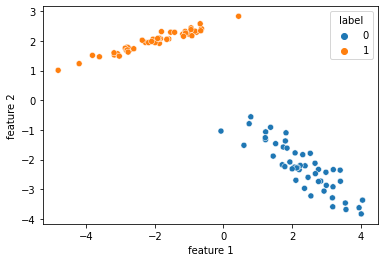

In [86]:
import pandas as pd
import seaborn as sns 
from sklearn.datasets import make_classification, make_blobs


X, y = make_classification(class_sep=2.0, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=333)

df = pd.DataFrame({'feature 1':X[:,0], 'feature 2':x[:,1], 'label':y})

sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')


Now we want to know the label of the following observations:

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

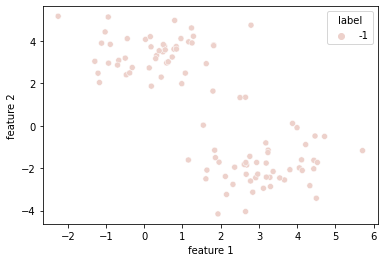

In [87]:
x_test, _ = make_blobs(n_samples=100, n_features=2, centers=2, center_box=(-3, 4),
                   random_state=888)

y_test = _*0 -1 # this is only for visualization proposes
df_test = pd.DataFrame({'feature 1':x_test[:,0], 'feature 2':x_test[:,1], 'label':y_test})

sns.scatterplot(data=df_test, x='feature 1', y='feature 2', hue='label')

Now together 

<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

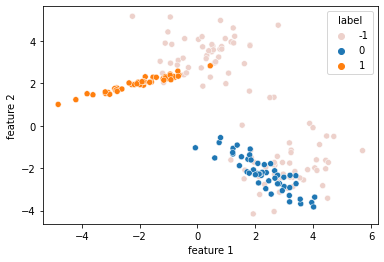

In [88]:
sns.scatterplot(data=df_test, x='feature 1', y='feature 2', hue='label')
sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')

Now we have one of the hardest options; which method we use to classify our data? 

We have from linear models, decision trees, K-NNs, SVMs, neural networks, logistic regression, etc. 

For now, for our example let's choose a simple linear discriminator. 



In [1]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=0)


clf.fit(X, y)

df_test['pred label'] = clf.predict(test)


sns.scatterplot(data=df_test, x='feature 1', y='feature 2', hue='pred label')
sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')

NameError: name 'X' is not defined

Great!

Let's use some of the sklearn tools to see how the classifier it's dividing the space 

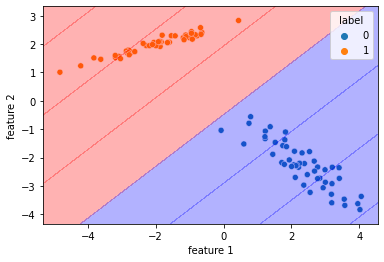

In [90]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm_bright = ListedColormap(["#FF0000", "#0000FF"])

h = 0.02

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

g = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)*-1
plt.contourf(xx, yy, Z, cmap=cm_bright, alpha=0.3)

Now, let's go over the theory of some common classifiers and at the end we will see how to apply them in Python.  

# KNN

The K-Nearest Neighbors (KNN) classifier it's one of the simplest algorithms for classification that still work reasonably well. 

Be mind full of not confusing it with the K-means algorithm for clustering and you have passed it's biggest difficulty.

Let's go over the steps for the algorithm:

1. Choose a value of K
2. Find the K nearest data points (usually on Euclidean Distance)
3. Whichever label is most common in these neighbors, use that as the prediction

And done!


Let's see an example: 

<img src="knn_example.jpg">

Even if the application of the algorithm it's easy, it has it's nuances that you need to be mindful. 

- We have to look at every datapoint in the training set, and compute the
distance to the point we want to classify. This is highly inefficient!
- Euclidean distance, while intuitive, is not the only distance function out
there. Others may work better!
- Not all features are equally important--but KNN treats them as equally
important!
- Units can get in the way! We might need to normalize.


# Decision trees 

- Decision tree algorithms provide a predictive model for classification or regression
- They build a top down hierarchical classification by splitting data along criteria in a tree structure
    - Criteria nodes carry the decision making
    - Leaf nodes carry the values
- They constitute the basis for random forest ensemble learning

<img src="decision_tree_example.jpg">

Let's look at another example 

<img src="decision_tree_example_2.jpg">

Then we can determine the class to predict on each partition by a majority vote. 

This looks great, but how do we determine the features to split on? 

For this we can use the Gini Index/Entropy. 

### Gini Index/Entropy

- Gini index/Entropy is the information gain of a feature
- At the root node, we take the feature that gives us the highest information gain
- When we have continuous features(Ex: Weight & Height), the need the best thresholds of the best feature as well
- Gini/Entropy chooses the feature and threshold that give the highest information gain.
- When we have discrete features, just the feature that gives the highest information gain is enough

### Gini vs Entropy 

- Both measure information gain of a feature
- Gini is faster
- Entropy is slightly better quality

## Training Decision Trees 

1. Start with the whole training set and an empty decision tree
2. Choose the feature that provides the highest information gain
3. Split on the feature and recurse on subpartitions

Random forest has some very strong advantages and disadvantages: 

### Advantages

- They are convenient

    - They are simple to understand and to interpret. Trees can be visualized.
    - They mimic the decision making in business, and decision can be explained.
    - They are able to handle multi-output problems.
    - They can handle both numerical and categorical data.
        - However scikit-learn implementation does not support categorical variables for now.
        
- They are cheap

    - They require little data preparation.
        - Other techniques often require data normalization, dummy variables need to be created and blank values to be removed.
    - The cost of using the tree (i.e., predicting data) is logarithmic in the number of
data points used to train the tree.
    - They tend to perform well even if its assumptions are somewhat violated by the true model from which the data were generated


### Disadvantages 

- They are not the most accurate
    - Compared to other supervised learning techniques
- They can get unstable
    - Small change in the data can lead to big change in the structure of the tree.
- Deep trees have a tendency to overfit.
    - Random-forest ensemble methods are used to minimize overfit.
- They can create bias
    - If the dataset classes are not balanced
- They are not great for continuous variables
    - They provide piecewise approximation
- Some patterns are hard to learn
    - Switching patterns like multiplexing, or exclusive OR logic



# SVM

Super Vector Machines (SVM) are the last algorithm that we will cover today and one of the most important that we will cover on this course. For complex cases they might be a bit outclassed by neural networks or some state of the art methods, but they are still a great solution for many problems. 

Basically, the SVM algorithm searches for the optimal hyperplane that separates the classes. But what does this mean? 

Let's look back to the perceptron model that we saw at the beginning: 

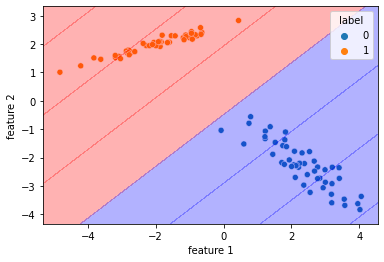

In [91]:
g = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')
plt.contourf(xx, yy, Z, cmap=cm_bright, alpha=0.3)

We can see the class separation of the model, but why is it there? 

There is an infinite amount of linear separations (or a hyperplane for multidimensional spaces) that we can use to classify our data, but is there an objectively better one? 

The answer is yes! 

We could choose the hyperplane that tries to go right on the middle of both classes. We can find that hyperplane by solving the following function: 

$$
min [\frac{1}{n}\sum_{i=1}^n max(0, 1 - y_i(w^Tx_i - b))] + \lambda ||w||^2
$$

Where x is our data, y is our labels, w is the normalized vector of the hyperplane, b the offset of the hyperplane and $\lambda$ is the factor for the tradeoff for nos separable observations.

Let's not worry too much about the math and instead let's see how it compares to the perceptron.

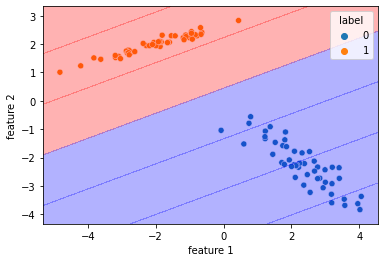

In [92]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=0.025)


svc.fit(X, y)

g = sns.scatterplot(data=df, x='feature 1', y='feature 2', hue='label')
Z_svc = svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z_svc = Z_svc.reshape(xx.shape)*-1
plt.contourf(xx, yy, Z_svc, cmap=cm_bright, alpha=0.3)

Comparing to our previous solution that looks more balanced. 

Now, not all (or most) problems can not be solved by a linear separations. To circumvent this we can use what is called a kernel trick. 

Basically, we use a kernel to project our observations to a feature space that can be lineally separated by the SVM. An example of a kernel transformation can be seen here: 

<img src="svm_example.png">

Let's see how it looks in Python. First let's try with a linear kernel.

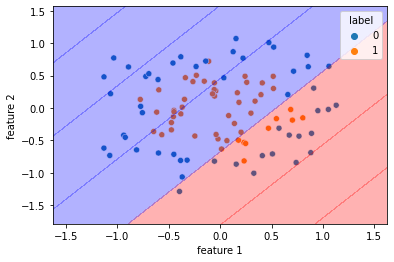

In [93]:
from sklearn.datasets import make_circles

X_circle, y_circle = make_circles(noise=0.2, factor=0.5, random_state=1)

df_circle = pd.DataFrame({'feature 1':X_circle[:,0], 'feature 2':X_circle[:,1], 'label':y_circle})

svc = SVC(kernel="linear", C=0.025) 


svc.fit(X_circle, y_circle)

h = 0.02

x_min, x_max = X_circle[:, 0].min() - 0.5, X_circle[:, 0].max() + 0.5
y_min, y_max = X_circle[:, 1].min() - 0.5, X_circle[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

g = sns.scatterplot(data=df_circle, x='feature 1', y='feature 2', hue='label')
Z_svc = svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z_svc = Z_svc.reshape(xx.shape)*-1
plt.contourf(xx, yy, Z_svc, cmap=cm_bright, alpha=0.3)

That does not look very useful.

Now let's see with the rbf kernel.

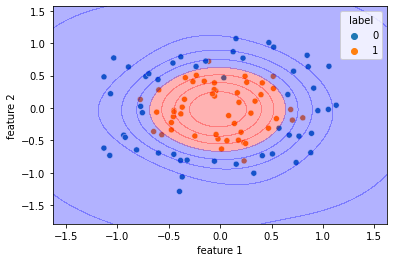

In [94]:
df_circle = pd.DataFrame({'feature 1':X_circle[:,0], 'feature 2':X_circle[:,1], 'label':y_circle})

svc = SVC(kernel="rbf", C=0.025) 


svc.fit(X_circle, y_circle)

h = 0.02

x_min, x_max = X_circle[:, 0].min() - 0.5, X_circle[:, 0].max() + 0.5
y_min, y_max = X_circle[:, 1].min() - 0.5, X_circle[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

g = sns.scatterplot(data=df_circle, x='feature 1', y='feature 2', hue='label')
Z_svc = svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) 
Z_svc = Z_svc.reshape(xx.shape)*-1
plt.contourf(xx, yy, Z_svc, cmap=cm_bright, alpha=0.3)

Now it separates the classes accordingly!


As a last point, lets explore the comparison between several algorithms provided by sklearn.

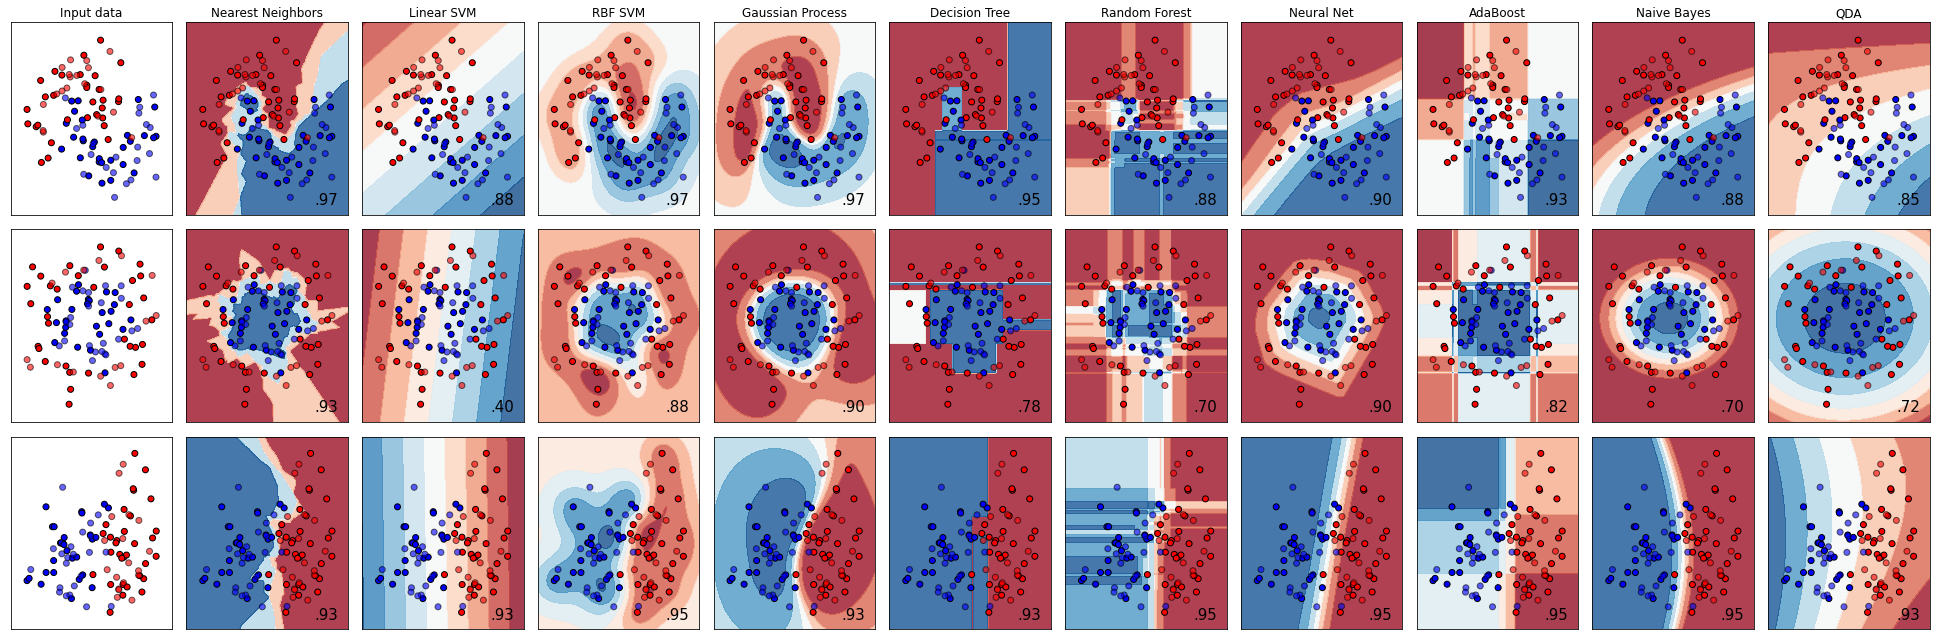

In [95]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# Exercise 
To get started, I'll briefly explain to you what the MNIST dataset is all about.
- SciKit Learn provides a dataset of handwritten digits (8*8 pixels). We will be using the pixel values to find the k nearest neighbors to complete our classification task.

- Once this model's up an running, you should be able to feed it image data and get returned the correct label (digit) that it represents.

Let's start! 


In [ ]:
import pandas as pd
from sklearn.datasets import load_digits



### Getting the data 


In [ ]:
# Loading the MNIST dataset

mnist = load_digits()
mnist.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### Viewing and getting info from the data

In [ ]:
# the dataframe for pixel data
mnist_df = pd.DataFrame(mnist.data)
# the dataframe for label data
mnist_labs = pd.DataFrame(mnist.target)

In [ ]:
# getting an information table
mnist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

From here, we can see that there are no missing values, and the type of the three columns, as well as the memory usage. We can also tell the number of rows and columns of this dataframe but you can always use the .shape attribute to 
double check.

In [ ]:
#TODO: use the .shape attribute to find the number of rows and columns
mnist_df.shape
mnist_labs.shape

(1797, 1)

Now, most of times, using info() is insufficient for us to get a good grasp of our data. This is when we need to use the describe method. If you went to the lecture, you would know that it returns a full statistical summary for all columns in the dataframe, which is very useful.

In [ ]:
mnist_df.describe
mnist_labs.describe

<bound method NDFrame.describe of       0
0     0
1     1
2     2
3     3
4     4
...  ..
1792  9
1793  0
1794  8
1795  9
1796  8

[1797 rows x 1 columns]>

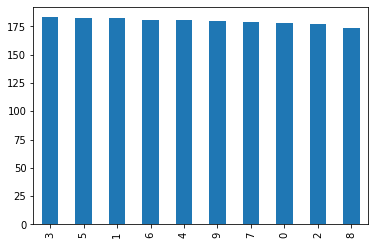

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
mnist_labs[0].value_counts().plot(ax=ax, kind='bar')

It looks like our data is not skewed to any specific category, which is good! This means we can split up our data into a testing and training set without much worry. Our training set is what we're going to use to train the model, and our test set is going to be used to test how accurate it is. We're also going to convert our dataframes to numpy arrays

In [ ]:
import numpy as np
# We're going to allocate 60% of the data to training, and 40% for testing
X_train = mnist_df.loc[0:round(0.60*mnist_df.shape[0])]
y_train = mnist_labs.loc[0:round(0.60*mnist_df.shape[0])]

X_test = mnist_df.loc[round(0.60*mnist_df.shape[0]):]
y_test = mnist_labs.loc[round(0.60*mnist_df.shape[0]):]


#Converting to numpy arrays
X_train = X_train.to_numpy()
print(X_train[0])
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


# Let's print out the dimensions of these arrays to make sure they make sense:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# All looks good!

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
(1079, 64)
(719, 64)
(1079, 1)
(719, 1)


# KNNs with sklearn

Let's move on to using the KNN model we discussed before. We can import the model.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Feel free to tinker with the n_neighbors value. There isn't a 'right' value 
# for K here, like there clearly was in K means for this problem

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

knn_model.fit(X_train, y_train)
predictions = knn_model.predict(X_test)
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Now we're going to take a look at the different hyperparameters available in Sklearn's KNeighborsClassifier object.

As you've seen in lecture, there are different ways we can have the model measure distance. The default is euclidean distance. Let's take a look at the sklearn website which shows us all the distance metrics we can use:

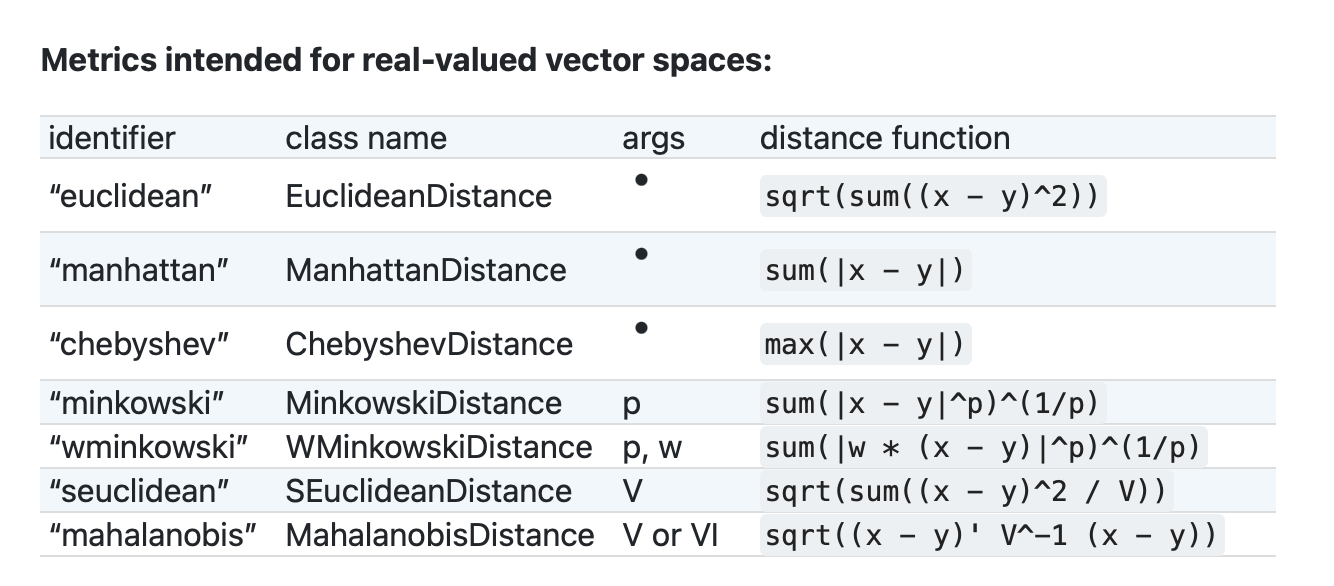



They also have a section for integer valued vector spaces. Since all of our data is integer based (i.e. we have no decimals), we can use these as well:
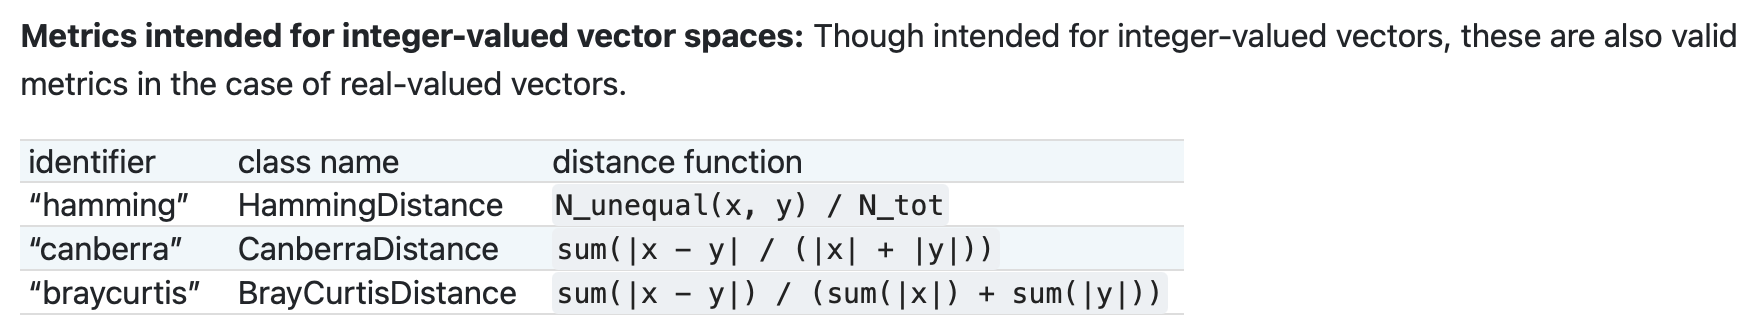


Recall that the way to modify the distance function in your model is as follows:

In [ ]:
new_knn = KNeighborsClassifier(metric='hamming')

If you try using this exact model we've instantiated here however, you may find the results disappointing. As it turns out, some distance functions perform very well on this task of image classification, while others won't do very well. Try redefining new_knn below to use different distance functions, and try to figure out which ones are better. (Hint: A loop might help you try multiple distances very efficiently)

Also note that certain distance metrics have extra parameters. For example the Minkowski metric utilizes a p value, so if you use that metric you should also take advantage of setting p to different values. 

In [ ]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric=)

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

In the material we also talked about some problems of the KNN algorithm. Luckily there are methods to minimize this disadvantages that also come with the sklearn implementation. 

Some of this methods reduce the amount of distances that the algorithm has to calculate. This greatly reduces the amount of time it take to compute, but let's make a test to very it. 

Take a look at the code below and change the algorithm to the different options available: 'auto', 'kd_tree', 'brute', and 'ball_tree'. Each time you run it, you'll see a metric indicating how long the computation took.

In [ ]:
import os  # We'll use this to measure time difference between different lines in the code

start_time = os.times()[0]

new_knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=25)

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)

end_time = os.times()[0]

print('Time spent: ', end_time-start_time)

# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))




Notice we made the K value quite high here. This was done to force the algorithm to compute a lot of distances, thus highlighting the difference between the algorithms. While the time difference between using these different algorithms is quite small, if the data set was tens of thousands of images instead of ~1700, the difference between these different algorithms would be very noticable.


Lastly, you can adjust how the model treats its k nearest neighbors. You can use the weights parameter when initializing your model, and set it equal to 'distance'. This will make the model weight neighbors that are closer, higher. In other words, if the data point we'd like to classify is t, and our k value is 4, and we find that of the 4 nearest neighbors to t, 2 are of Class A and 2 are of Class B, then we can instead weight the 2 points that are closer in order to prioritize them more. This is what the model is doing when you set weights='distance'.

You can also set weight equal to 'uniform', but this is just the standard implementation of KNN.

# Applying PCA on the MNIST dataset

We'll be using the MNIST dataset once again, but this time the dataset will be larger, and the images will be of higher resolution.

- SciKit Learn provides a dataset of handwritten digits (28*28 pixels). We will be using PCA to reduce the dimensionality of this dataset.

- Once we start reducing dimensionality using these techniques, we can visualize the images to see how much data we lost.

Let's start! 


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml



### Getting the MNIST data (28 * 28) 


In [ ]:
# Loading the MNIST dataset
# This will likely take several seconds to load--don't worry!
mnist = fetch_openml('mnist_784')
# These are the images
mnist.data.shape


KeyboardInterrupt: ignored

In [ ]:
# These are the labels
mnist.target.shape

(70000,)

### Splitting our dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
# training images
print(train_img.shape)
# training labels
print(train_lbl.shape)
# test images
print(test_img.shape)
# test labels
print(test_lbl.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's move on to using the KNN model we discussed in last week's lecture and lab. Use what you learned last week to implement the model. Afterwards we will use PCA to compare how fast the models train!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import os
# Use what you learned last week to instantiate, train, and predict using the KNN 
# Then, calculate the model's accuracy
# Note: Since we are not using PCA here, this will likely take ~1 minute to 
# compute all of the predictions.

start_time = os.times()[0]
count = 0

# TODO:
knn_model = KNeighborsClassifier()


end_time = os.times()[0]

# Prints the percentage of predictions that were correct
print('Time spent(without PCA): ', end_time-start_time)
print('Accuracy: ', count/len(predictions))


In [ ]:
#@title Solution (Double click to see)
# SOLUTION
# Feel free to tinker with the n_neighbors value. There isn't a 'right' value 
# for K here, like there clearly was in K means for this problem

start_time = os.times()[0]

knn_model.fit(train_img, train_lbl)

predictions = knn_model.predict(test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1

end_time = os.times()[0]

# Prints the percentage of predictions that were correct
print('Time spent(without PCA): ', end_time-start_time)
print('Accuracy: ', count/len(predictions))

Time spent(without PCA):  69.0
Accuracy:  0.9466


# KNN with sklearn after PCA

Our first step is to standardize our dataset; standardization is the transformation of data to a standard scale( from 0 to 1), which makes sure that the features with large values don't dominate our predictions (for more on this refer back to the previous week material).

PCA is a variance maximizing exercise, meaning standardization is really important! As such, you need to scale features in the MNIST dataset before applying PCA.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fitting on training set.
scaler.fit(train_img)

# applying transformation on both the train and test image set
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

Now, we'll instantiate PCA. The 0.95 for the number of components tells scikit learn to choose the minimum number of components so that 95% of the variance is explained by them. This is much easier than manually trying different values, as we did with the Iris dataset!

In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the PCA model
pca = PCA(.95)

In [ ]:
# fitting on the train dataset
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# these are the components of the PCA model
pca.n_components_

327

In [ ]:
# using the PCA model to transform both the training and test data
pca_train_img = pca.transform(train_img)
pca_test_img = pca.transform(test_img)

We can go from a compressed representation (327 components) back to an approximation of the original high dimensional data (784 components).

In [ ]:
approximation = pca.inverse_transform(pca_train_img)

In [ ]:
approximation[0]

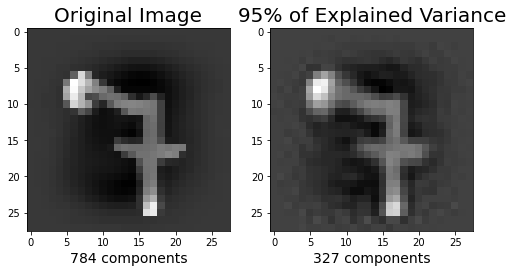

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4));
# Original Image
plt.subplot(1, 2, 1);
plt.imshow(train_img[0].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[
                         0].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest');
plt.xlabel('327 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);

An important factor to consider is that we already scaled the images, so the pixel values are very skewed. That's why both of our images look a bit washed out.

In [ ]:
# Again, feel free to tinker with the n_neighbors value. 
start_time = os.times()[0]

knn_model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")

knn_model.fit(pca_train_img, train_lbl)

predictions = knn_model.predict(pca_test_img)
count = 0
for i in range(len(predictions)):
  if predictions[i] == test_lbl[i]:
    count += 1

end_time = os.times()[0]

print('Time spent(without PCA): ', end_time-start_time)
# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

Time spent(without PCA):  36.73999999999995
Accuracy:  0.9519


Using PCA reduced the time taken our model by almost half, this is just a glimpse of how PCA can help improve the efficiency of our model while also allowing us to visualise higher dimensional data in a more interpretable form.

However, just like everything PCA has its benefits as well as some shortcomings and it's up to you to make a trade off between the accuracy and the efficiency of your model. For more on this check out the link in resources.

In [ ]:
# Try different distance metrics, and see which one performs best!

new_knn = KNeighborsClassifier(metric=)

new_knn.fit(X_test, y_test)
predictions = new_knn.predict(X_test)


# Accuracy code copied from above for convenience
count = 0
for i in range(len(predictions)):
  if predictions[i] == y_test[i]:
    count += 1


# Prints the percentage of predictions that were correct
print('Accuracy: ', count/len(predictions))

# References


https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://archive.ics.uci.edu/ml/datasets/iris

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

